# Assignment 1: Small Image Dataset

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Function that takes in input an image (a matrix) and the proportion of pixels to be distorted (d)

def distort_image(im, d):
    if d < 0 or d > 1:
        print("Out-of-bound proportion: going to default 0.05")
        d = 0.05     # if d is out of the valid range [0,1], set a default value of 0.05.


    imd = np.copy(im)    #copy of the input image
    indx = np.random.permutation(len(imd.ravel()))   #permutation of the indices of the flattened copy image
    todist = indx[:round(len(indx) * d)]     #select a subset of the indices to be distorted (the first d %)
    imd.flat[todist] = -imd.flat[todist]     #apply the distortion to the selected pixels

    return imd   #return the distorted image

### Import the data

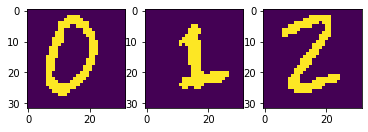

In [27]:
p0 = np.loadtxt('./lab2_2_data/p0.csv')
p1 = np.loadtxt('./lab2_2_data/p1.csv')
p2 = np.loadtxt('./lab2_2_data/p2.csv')

#convert to 32x32 matrix format
im0 = np.transpose(np.reshape(p0, (32, 32)))
im1 = np.transpose(np.reshape(p1, (32, 32)))
im2 = np.transpose(np.reshape(p2, (32, 32)))

#show images
plt.figure()
plt.subplot(1,3,1)
plt.imshow(im0)
plt.subplot(1,3,2)
plt.imshow(im1)
plt.subplot(1,3,3)
plt.imshow(im2)
plt.show()

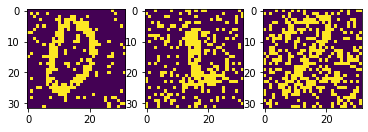

In [28]:
#example of distortion
im0d = distort_image(im0, 0.1)
im1d = distort_image(im1, 0.2)
im2d = distort_image(im2, 0.3)



plt.figure()
plt.subplot(1,3,1)
plt.imshow(im0d)
plt.subplot(1,3,2)
plt.imshow(im1d)
plt.subplot(1,3,3)
plt.imshow(im2d)
plt.show()

# Storage Phase (learning)

Weights are set based on correlations between the fundamental memories (Hebbian Learning)

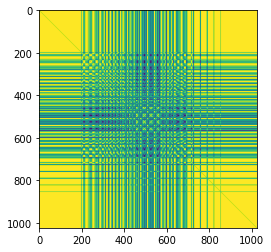

In [29]:
size = len(np.outer(p2,p2))

#weight matrix:
w = (1/len(p0))*((np.outer(p0,p0)+np.outer(p1,p1)+np.outer(p2,p2))-3*np.identity(size))

plt.imshow(w)
plt.show()

# Retrieval Phase

In [30]:
#function that takes in input a probe image, the correct memory image it should converge to, the distortion applied, and the colormap
def retrieval(probe, img_in, distortion, colormap):
    #initialization
    x = np.copy(probe.T.ravel()) #linearize probe image into a vector 

    bias = np.random.normal(0.52, 0.01, size=len(x)) #gaussian bias applied to neurons (mean and std are chosen in order to optimize recall in the following examples)
    #plot of the bias
    xx=np.arange(0,len(bias))
    plt.figure(figsize=(10,12))
    plt.subplot(3,2,1)
    plt.title('Bias applied to Neurons')
    plt.xlabel('Neuron')
    plt.ylabel('Bias Value')
    plt.plot(xx,bias, color = 'black', linewidth= 0.5)

    #iteration until convergence
    epochs = 100 #max number of epochs

    #arrays to store values of energy and overlaps
    E_hist = []
    m0_hist = []
    m1_hist = []
    m2_hist = []

    for N in range (epochs):

        xold = np.copy(x) #store values of neurons in order to compare with next epoch

        i = np.random.permutation(len(x)) #to choose neurons in random order
        for j in i:
            x[j] = np.sign(np.dot(w[j,:], x)+bias[j]) #apply the update equation

            #commpute overlap functions 
            m0 = 1/len(p0)*np.dot(p0,x)
            m1 = 1/len(p1)*np.dot(p1,x)
            m2 = 1/len(p2)*np.dot(p2,x)
            m0_hist = np.append(m0_hist, m0)
            m1_hist = np.append(m1_hist, m1)
            m2_hist = np.append(m2_hist, m2)

            #compute Energy
            E = -0.5*np.dot(x,np.dot(w,x)) - np.dot(bias,x)
            E_hist = np.append(E_hist, E)

        #if in one epoch no neuron changes its value, stop iterting (fixed point reached)
        if np.array_equal(x, xold):
            print('stop iterating') 
            break

    #make plots
    plt.subplot(3,2,3)
    plt.title('Energy')
    t=np.arange(0,len(E_hist))
    plt.plot(t, E_hist, label = 'E', color = 'black')
    plt.xlabel('update #')
    plt.ylabel('Energy function')

    plt.subplot(3,2,5)
    plt.title('Overlaps')
    plt.plot(t, m0_hist, label = '0', color = 'green')
    plt.plot(t, m1_hist, label = '1', color = 'blue')
    plt.plot(t, m2_hist, label = '2', color = 'red')
    plt.xlabel('update #')
    plt.ylabel('Overlap function')

    plt.legend()

    #reconstructed image
    imx = np.transpose(np.reshape(x, (32, 32)))

    #measure of discrepancy (calculate the number of pixel that differ between the reconstructed image and the input pattern)
    d = 0
    p_in = img_in.T.ravel()
    for i in range(len(x)):
        if x[i] != p_in[i]:
            d = d+1
    #express d in terms of pixel percentage
    d = d/(32*32)
    print(f'Discrepancy = {100*d} %')



    plt.subplot(3,2,2)
    plt.title(f'Memorized Input')
    plt.imshow(img_in,  cmap = colormap)

    plt.subplot(3,2,4)
    plt.title(f'Perturbed Input \n Distortion = {distortion}')
    plt.imshow(probe,  cmap = colormap)

    plt.subplot(3,2,6)
    plt.title(f'Reconstructed Input \n Discrepancy = {100*d} %')
    plt.imshow(imx, cmap = colormap)
    plt.tight_layout() 


# Make required plots

stop iterating
Discrepancy = 3.90625 %
stop iterating
Discrepancy = 3.90625 %
stop iterating
Discrepancy = 3.90625 %
stop iterating
Discrepancy = 4.6875 %
stop iterating
Discrepancy = 4.6875 %
stop iterating
Discrepancy = 16.50390625 %
stop iterating
Discrepancy = 1.171875 %
stop iterating
Discrepancy = 1.171875 %
stop iterating
Discrepancy = 1.171875 %


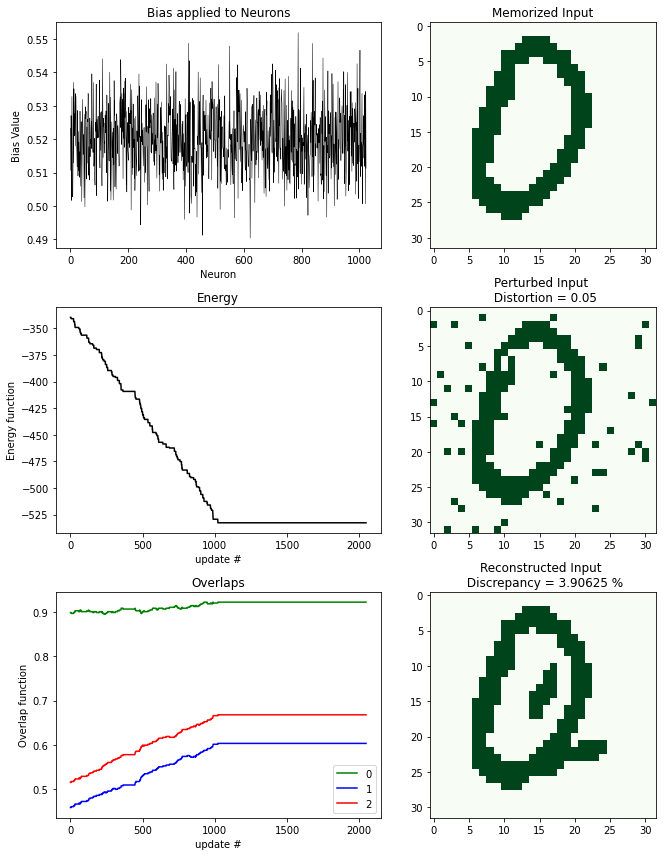

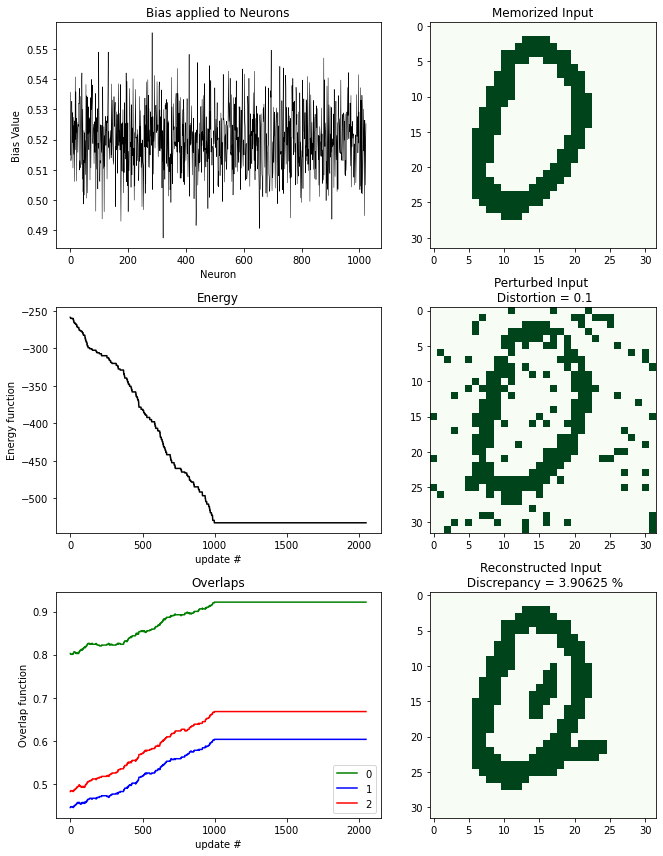

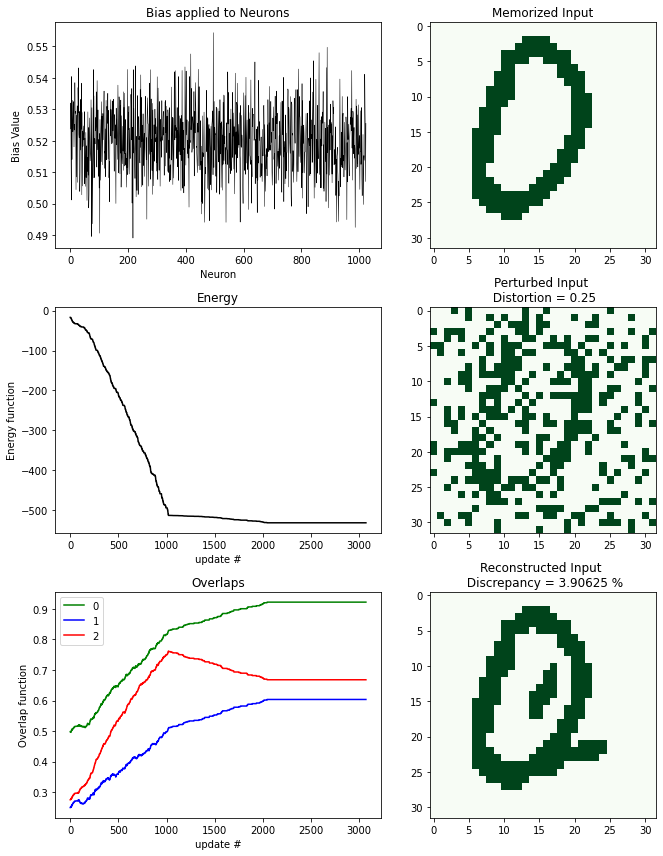

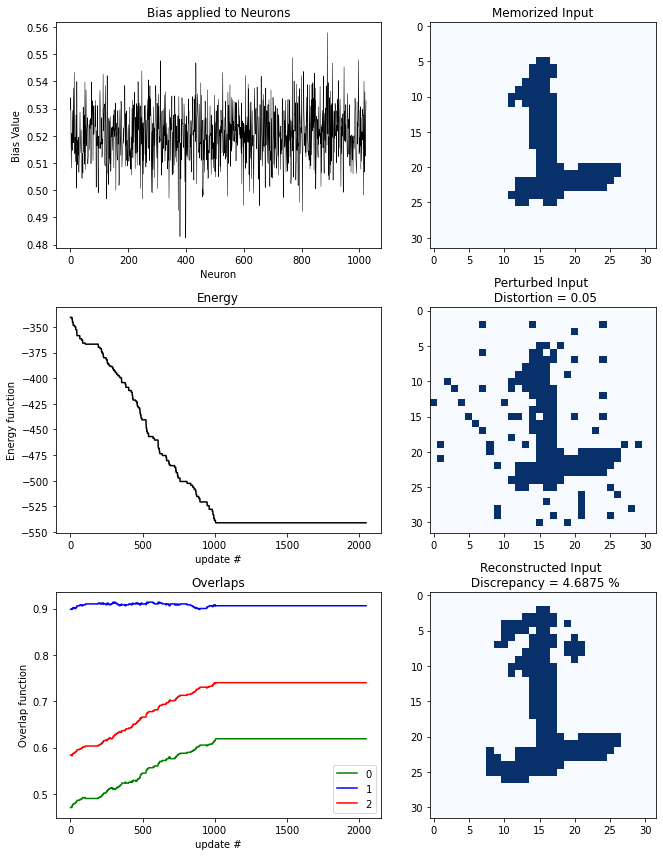

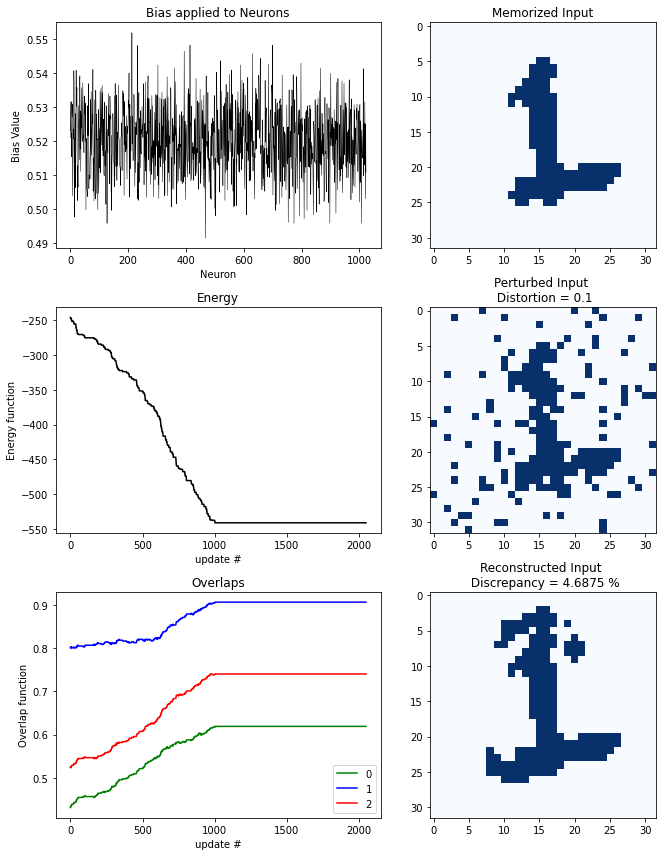

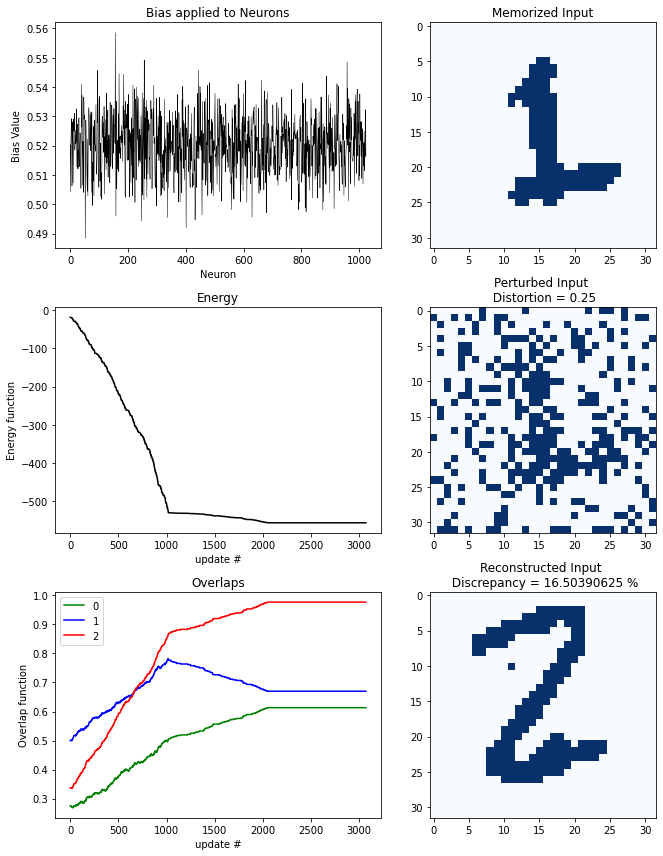

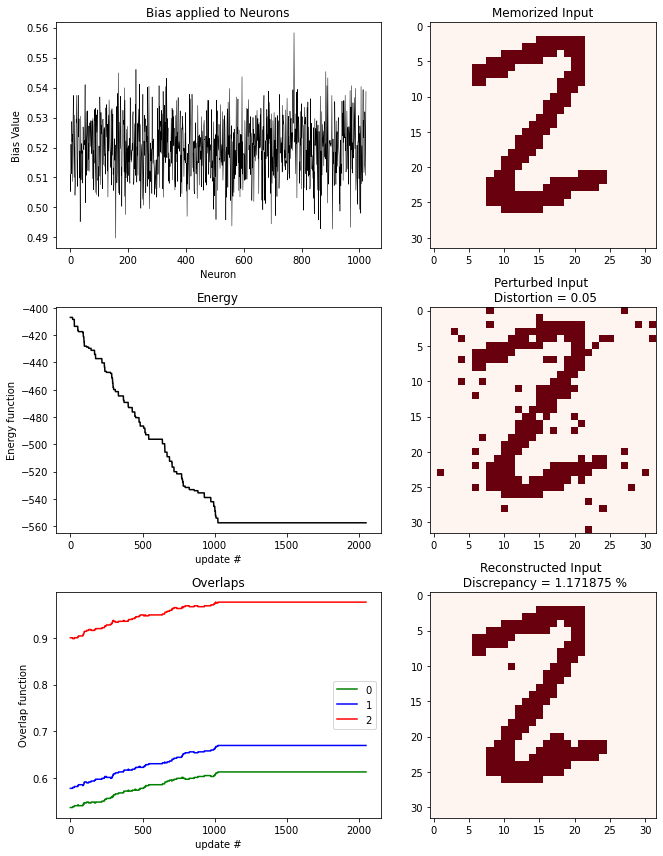

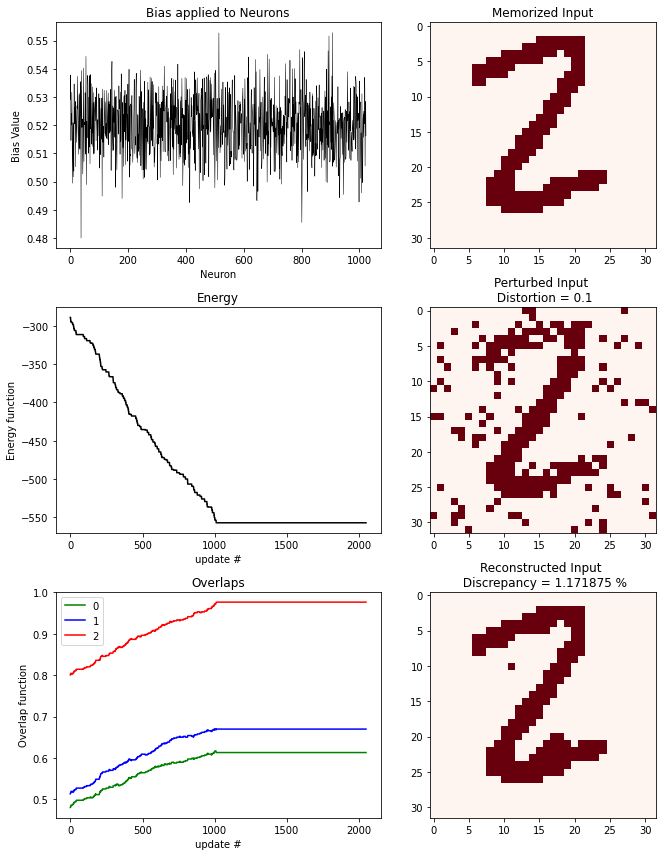

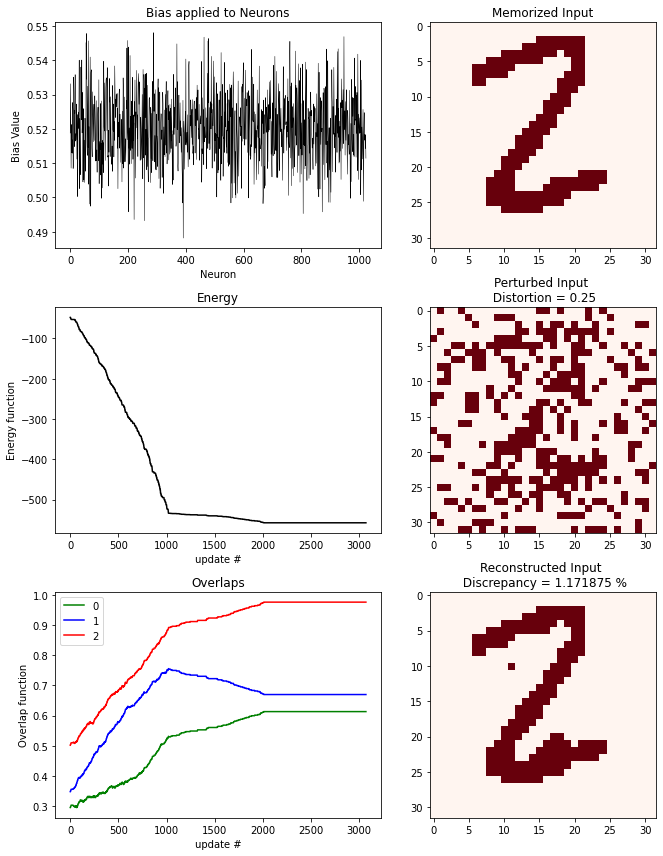

In [31]:
d1 = 0.05
d2 = 0.1
d3 = 0.25

#0
probe = distort_image(im0, d1)
#plt.imshow(probe)

retrieval(probe, im0, d1, colormap = 'Greens')
plt.savefig(f'plots_assignment1/0_dist{d1}',format='pdf')

probe = distort_image(im0, d2)
retrieval(probe, im0, d2, colormap = 'Greens')
plt.savefig(f'plots_assignment1/0_dist{d2}',format='pdf')

probe = distort_image(im0, d3)
retrieval(probe, im0, d3, colormap = 'Greens')
plt.savefig(f'plots_assignment1/0_dist{d3}',format='pdf')

#1
probe = distort_image(im1, d1)
retrieval(probe, im1, d1, colormap = 'Blues')
plt.savefig(f'plots_assignment1/1_dist{d1}',format='pdf')

probe = distort_image(im1, d2)
retrieval(probe, im1, d2, colormap = 'Blues')
plt.savefig(f'plots_assignment1/1_dist{d2}',format='pdf')

probe = distort_image(im1, d3)
retrieval(probe, im1, d3, colormap = 'Blues')
plt.savefig(f'plots_assignment1/1_dist{d3}',format='pdf')

#2
probe = distort_image(im2, d1)
retrieval(probe, im2, d1, colormap = 'Reds')
plt.savefig(f'plots_assignment1/2_dist{d1}',format='pdf')

probe = distort_image(im2, d2)
retrieval(probe, im2, d2, colormap = 'Reds')
plt.savefig(f'plots_assignment1/2_dist{d2}',format='pdf')

probe = distort_image(im2, d3)
retrieval(probe, im2, d3, colormap = 'Reds')
plt.savefig(f'plots_assignment1/2_dist{d3}',format='pdf')

# There is no perfect recall, especially for high distortion, due to the presence of spurious local minima